In [1]:
import numpy as np, basic, prjlib, plottools as pl
from matplotlib.pyplot import *

In [2]:
Tcmb = 2.72e6
fig_kwargs = {'fsize':[5,5],'usetex':True,'ylabsize':18,'xticks_labsize':16,'yticks_labsize':16,'legend_size':16,'xlab':r'$l$','ylab':'','ylog':True}

In [3]:
p = {}
lsamax = 1500
TT, EE, BB, TN, EN, BN = {}, {}, {}, {}, {}, {}
for t, lmax in [('sa',lsamax),('la',4096)]:
    for ntype in ['base','goal']:
        p[t+ntype] = prjlib.analysis_init(t=t,freq='com',ntype=ntype+'_roll50')
        print('loading from',p[t+ntype].fcmb.scl['o'])
        l, TT[t+ntype], EE[t+ntype], BB[t+ntype] = np.loadtxt(p[t+ntype].fcmb.scl['s'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
        l, TN[t+ntype], EN[t+ntype], BN[t+ntype] = np.loadtxt(p[t+ntype].fcmb.scl['n'],unpack=True,usecols=(0,1,2,3))[:,:lmax+1]
L = np.linspace(0,lsamax,lsamax+1)
s = l*(l+1.)*Tcmb**2/2./np.pi
S = L*(L+1.)*Tcmb**2/2./np.pi

loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sacom_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/sacom_goal_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_base_roll50_mv3_a5.0deg_none_o.dat
loading from /project/projectdirs/sobs/delensing/cmbsims/aps/lacom_goal_roll50_mv3_a5.0deg_none_o.dat


Temperature

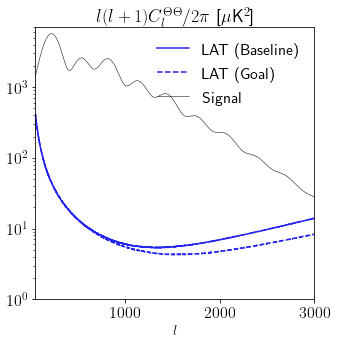

In [4]:
pl.plot_1dstyle(xmin=50,xmax=3000,ymin=1.,ymax=7e3,**fig_kwargs)
co = rcParams['axes.prop_cycle'].by_key()['color']
plot(l,s*TN['labase'],color=co[0],label='LAT (Baseline)')
plot(l,s*TN['lagoal'],color=co[0],ls='--',label='LAT (Goal)')
plot(l,s*p['labase'].lTT[:lmax+1],'k-',lw=.5,label='Signal')
title('$l(l+1)C_l^{\Theta\Theta}/2\pi$ [$\mu$K$^2$]',fontsize=18)
legend(loc=0)
savefig('fig_cmb_TT.pdf')

Polarization

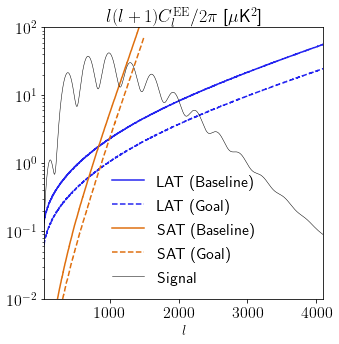

In [5]:
pl.plot_1dstyle(xmin=50,xmax=4096,ymin=1e-2,ymax=1e2,**fig_kwargs)
plot(l,s*EN['labase'],color=co[0],label='LAT (Baseline)')
plot(l,s*EN['lagoal'],color=co[0],ls='--',label='LAT (Goal)')
plot(L,S*EN['sabase'],color=co[1],label='SAT (Baseline)')
plot(L,S*EN['sagoal'],color=co[1],ls='--',label='SAT (Goal)')
plot(l,s*p['labase'].lEE[:lmax+1],'k-',lw=.5,label='Signal')
title(r'$l(l+1)C_l^{\rm EE}/2\pi$ [$\mu$K$^2$]',fontsize=18)
legend(loc=0)
savefig('fig_cmb_EE.pdf')

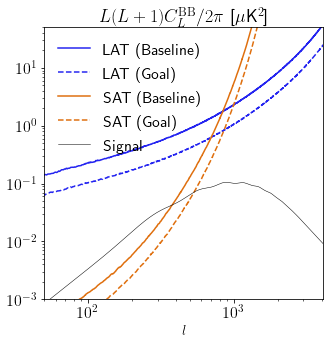

In [6]:
# BB + noise
pl.plot_1dstyle(xmin=50,xmax=4096,xlog=True,ymin=1e-3,ymax=5e1,**fig_kwargs)
plot(l,s*BN['labase'],color=co[0],label='LAT (Baseline)')
plot(l,s*BN['lagoal'],color=co[0],ls='--',label='LAT (Goal)')
plot(L,S*BN['sabase'],color=co[1],label='SAT (Baseline)')
plot(L,S*BN['sagoal'],color=co[1],ls='--',label='SAT (Goal)')
plot(l,s*p['labase'].lBB[:lmax+1],'k-',lw=.5,label='Signal')
title(r'$L(L+1)C_L^{\rm BB}/2\pi$ [$\mu$K$^2$]',fontsize=18)
legend(loc=0)
savefig('fig_cmb_BB.pdf')